<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Parcial1_Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

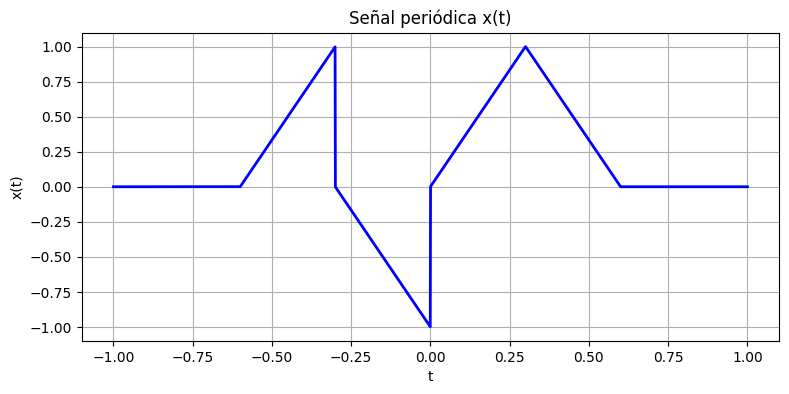

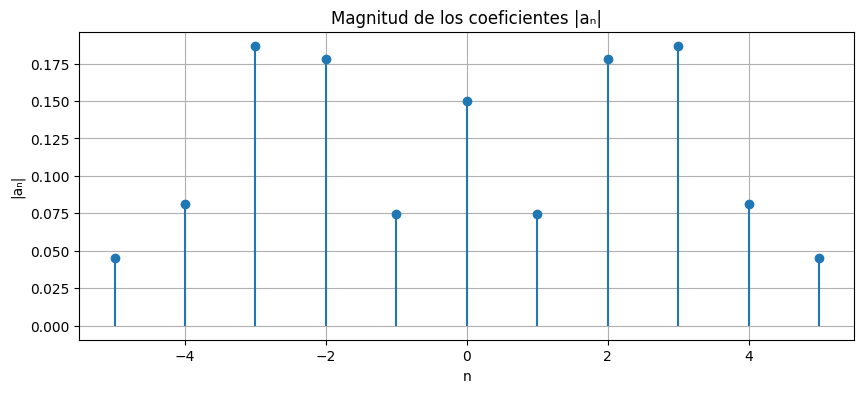

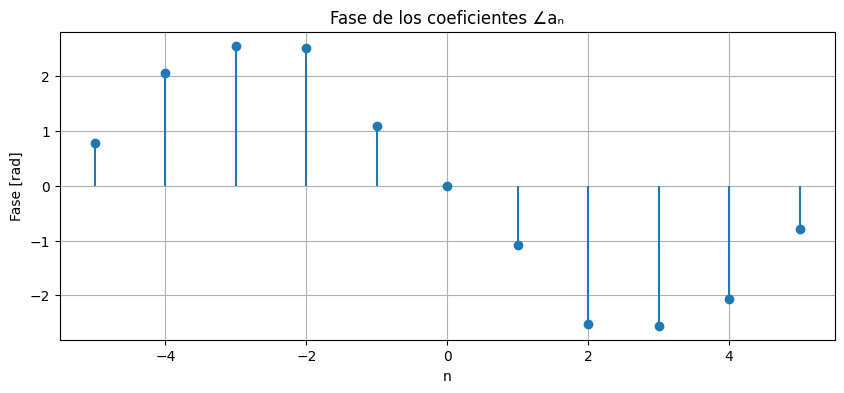

,n,Re(a_n),Im(a_n),|a_n|,fase(a_n)[rad],|a_n''|,Error_rel
0,-5,0.0318,0.0318,0.0450,0.7842,11.0942,0.9959
1,-4,-0.0383,0.0719,0.0815,2.0605,12.8720,0.9937
2,-3,-0.1556,0.1035,0.1869,2.5545,16.6003,0.9887
3,-2,-0.1440,0.1042,0.1777,2.5149,7.0170,0.9747
4,-1,0.0349,0.0657,0.0743,1.0828,0.7338,0.8987
5,0,0.1499,0.0000,0.1499,0.0000,0.0000,NaN
6,1,0.0349,-0.0657,0.0743,-1.0828,0.7338,0.8987
7,2,-0.1440,-0.1042,0.1777,-2.5149,7.0170,0.9747
8,3,-0.1556,-0.1035,0.1869,-2.5545,16.6003,0.9887
9,4,-0.0383,-0.0719,0.0815,-2.0605,12.8720,0.9937


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros de la señal
A = 1
T = 2
d1 = 0.3
d2 = 0.6
w0 = 2 * np.pi / T

# Definición de la señal periódica x(t)
def x_t(t):
    t = np.mod(t + T / 2, T) - T / 2
    x = np.zeros_like(t)
    mask1 = (t >= -d2) & (t < -d1)
    x[mask1] = A * (t[mask1] + d2) / (d2 - d1)
    mask2 = (t >= -d1) & (t < 0)
    x[mask2] = -A * (t[mask2] + d1) / d1
    mask3 = (t >= 0) & (t < d1)
    x[mask3] = A * t[mask3] / d1
    mask4 = (t >= d1) & (t < d2)
    x[mask4] = A - A * (t[mask4] - d1) / (d2 - d1)
    return x

# Malla temporal
N = 2000
t = np.linspace(-T / 2, T / 2, N)
xt = x_t(t)

# --- Cálculo de los coeficientes de Fourier ---
def an(n):
    return (1 / T) * np.trapezoid(xt * np.exp(-1j * n * w0 * t), t)

n_vals = np.arange(-5, 6)
a_n = np.array([an(n) for n in n_vals])
a_n_dd = -(n_vals * w0) ** 2 * a_n  # coeficientes de x''(t)

# --- Espectros ---
plt.figure(figsize=(9, 4))
plt.plot(t, xt, 'b', lw=2)
plt.title("Señal periódica x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(n_vals, np.abs(a_n), basefmt=" ")
plt.title("Magnitud de los coeficientes |aₙ|")
plt.xlabel("n")
plt.ylabel("|aₙ|")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(n_vals, np.angle(a_n), basefmt=" ")
plt.title("Fase de los coeficientes ∠aₙ")
plt.xlabel("n")
plt.ylabel("Fase [rad]")
plt.grid(True)
plt.show()

# --- FFT para comparar ---
fft_vals = np.fft.fftshift(np.fft.fft(xt) / N)
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=t[1] - t[0])) * T
fft_selected = np.array([fft_vals[np.argmin(np.abs(freqs - n))] for n in n_vals])

# --- Error relativo corregido ---
error_rel = np.zeros_like(np.abs(a_n_dd))
for i in range(len(a_n_dd)):
    if np.abs(a_n_dd[i]) > 1e-12:
        error_rel[i] = np.abs((np.abs(a_n_dd[i]) - np.abs(fft_selected[i])) / np.abs(a_n_dd[i]))
    else:
        error_rel[i] = np.nan  # evita división por cero

# --- Tabla de resultados ---
tabla = pd.DataFrame({
    "n": n_vals,
    "Re(a_n)": np.real(a_n),
    "Im(a_n)": np.imag(a_n),
    "|a_n|": np.abs(a_n),
    "fase(a_n)[rad]": np.angle(a_n),
    "|a_n''|": np.abs(a_n_dd),
    "Error_rel": error_rel
})

pd.set_option("display.precision", 4)
display(tabla)
